In [16]:
# Librerías necesarias para el proyecto
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
# Rutas de las carpetas de entrenamiento, predicción y test
training_path = 'training'
test_path = 'test'
prediction_path = 'prediction'

In [33]:
# Aumentación de datos
datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 10,
							width_shift_range = 0.2,
						#	height_shift_range = 0.2,
						#	shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True)

Found 14034 images belonging to 6 classes.


<Figure size 640x480 with 0 Axes>

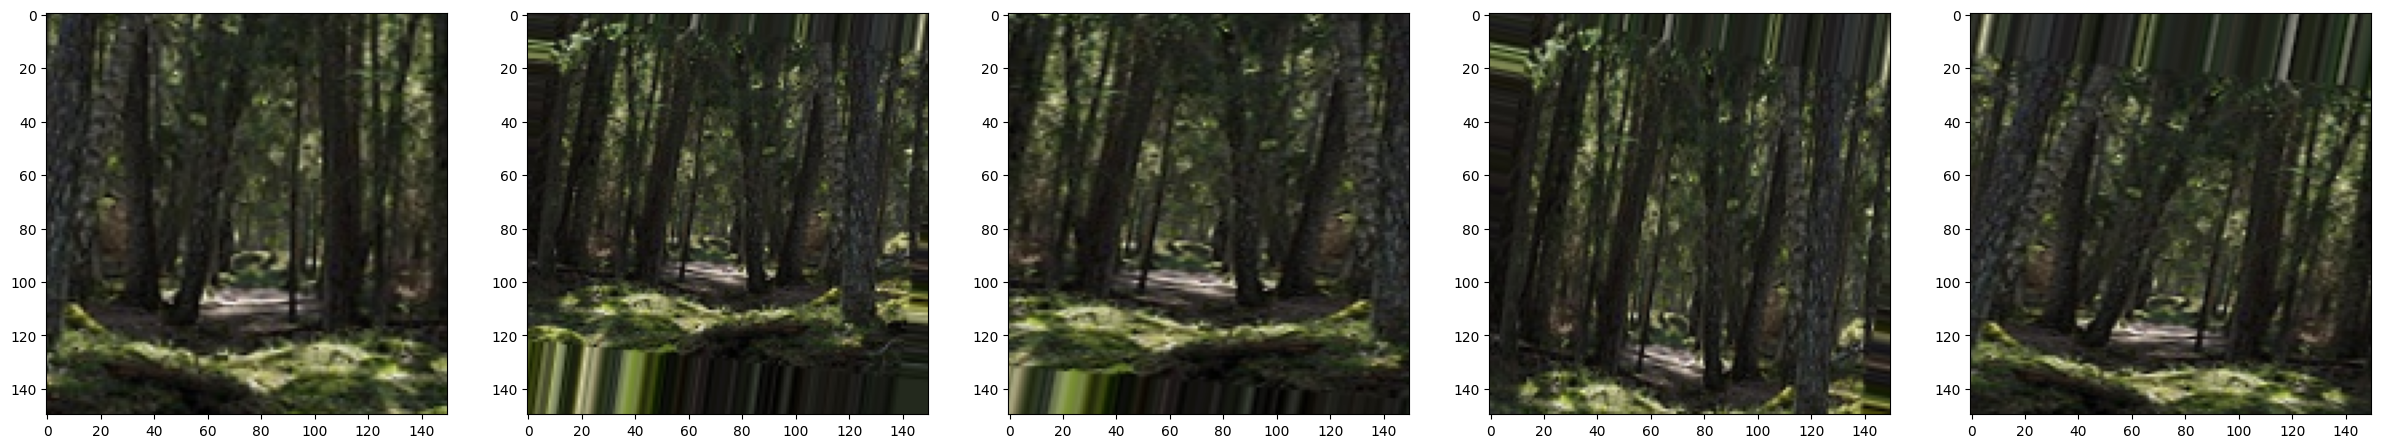

In [34]:
# Se crea un generador de datos a partir de un directorio de entrenamiento
train_generator = datagen.flow_from_directory(
							training_path,
							target_size = (150, 150),
							batch_size = 1,
							class_mode ='binary',
							)

# Crear un plt para mostrar las imágenes
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

# Iterar sobre las primeras 5 imágenes del generador y mostrarlas
for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 14034 images belonging to 6 classes.
(8, 150, 150, 3)
[5. 1. 4. 2. 1. 1. 3. 3.]


<Figure size 640x480 with 0 Axes>

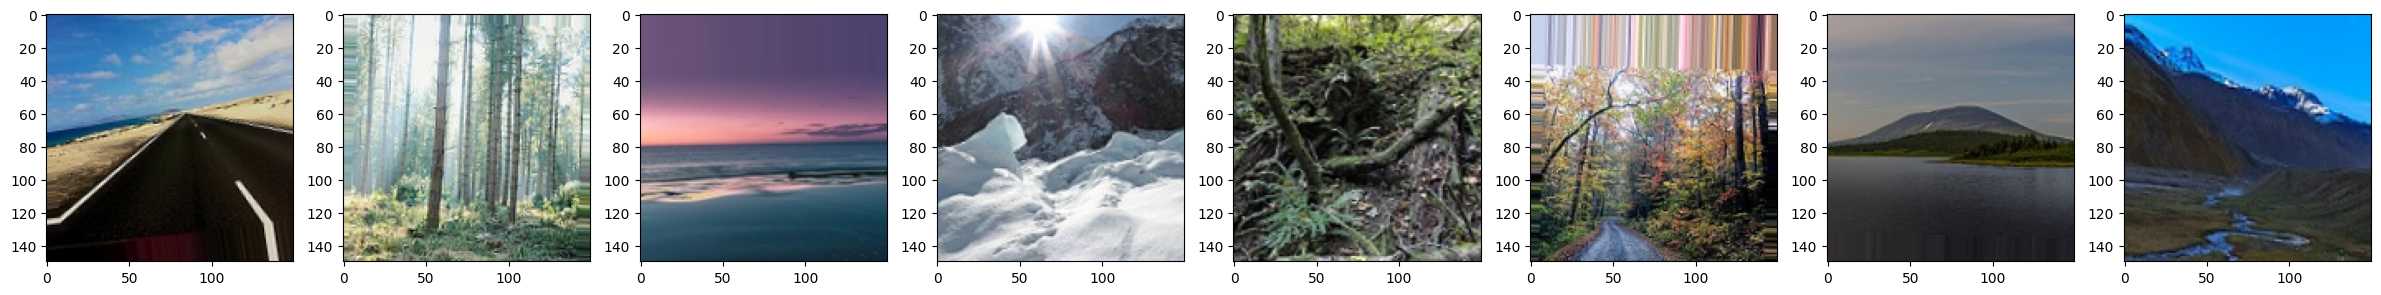

In [25]:
# Directorio donde se guardarán las imágenes aumentadas
save_dir = "augmented"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

train_generator = datagen.flow_from_directory(
							training_path,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= save_dir,
              save_prefix='aug',
              save_format='png'
							)

images , labels = train_generator[0]

print(images.shape)
print(labels)
plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])
  
# Guardar las imágenes aumentadas
for i, _ in enumerate(train_generator): 
    if i >= 8: 
        break